# Getting the data
For this project, the MNIST dataset will be retrieve from `sklearn.datasets`.
***
This is a set of 70k small imagesof handwritten digits. 

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version = 1)

## Exploring the dataset

In [2]:
keys = [print(key) for key in mnist.keys()]

print(mnist.DESCR)

data
target
frame
categories
feature_names
target_names
DESCR
details
url
**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used b

There are 70,000 images, and each image has 784 features. This is because each image
is 28×28 pixels, and each feature simply represents one pixel’s intensity, from 0
(white) to 255 (black)

In [3]:
X, y = mnist['data'], mnist['target']
y = y.astype(int)
print(X.shape, y.shape)

(70000, 784) (70000,)


In [4]:
X.head(2)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
y.head(2)

0    5
1    0
Name: class, dtype: int32

In [6]:
y = pd.DataFrame(y)

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

some_digit = X.head(1)
some_digit_image = np.array(some_digit).reshape(28, 28)

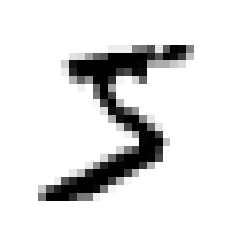

In [102]:
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

## Traning and Testing datasets
---
The MNIST dataset is actually already split into a training set (the first 60,000
images) and a test set (the last 10,000 images)

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Training a Binary Classifier
---
Trying to identify one specific object

In [10]:
# Creating the target vectors for this classification task
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

Using *Stochastic Gradient Descent (SGD)* with `SGDClassifier`

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5['class'])

SGDClassifier(random_state=42)

In [12]:
sgd_clf.predict(some_digit)

array([ True])

## Performance evaluation

### Measuring Accuracy Using Cross-Validation

#### **Using Cross-Validation**
---
- Using `cross_val_score()` function to evaluate the SGDClassifier model using K-fold cross-validation, with three folds. 
- K-fold crossvalidation means splitting the training set into K-folds (in this case, three), then making predictions and evaluating them on each fold using a model trained on the remaining folds.

In [13]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5['class'], cv = 3, scoring = "accuracy")

array([0.95035, 0.96035, 0.9604 ])

The accuracy is very high, but it will be always 90% or more since only just about 10% of the images are 5s. This is why accuracy is generally not the preferred performance measure for classifiers, especially when dealing with *skewed datasets* (i.e., when someclasses are much more frequent than others)

#### **Confusion Matrix**
---
- The general idea is to count the number of times instances of class A are classified as class B.
- To compute the confusion matrix, it is first needed to have a set of predictions, so they
can be compared to the actual targets:
    - Just like the cross_val_score() function, cross_val_predict() performs K-fold cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each fold.

In [14]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5['class'], cv = 3)

The confusion matrix has four cells, each representing a possible outcome of the classification:

- **True negatives (TN):** These are the images that are not 5s and the classifier correctly predicted that they are not 5s.
- **False positives (FP):** These are the images that are not 5s but the classifier wrongly predicted that they are 5s.
- **False negatives (FN):** These are the images that are 5s but the classifier wrongly predicted that they are not 5s.
- **True positives (TP):** These are the images that are 5s and the classifier correctly predicted that they are 5s.

In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5['class'], y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

|       | Negative | Positive |
|-------|-----------------|-------------|
| Negative | 53892 (TN)          | 687 (FP)      |
| Positive     | 1891 (FN)           | 3530  (TP)     |

-1 Using a **Precision Score** (measures how accurate the classifier is when it makes a positive prediction):

$$precision = \dfrac{TP}{TP + FP}$$

2- Using a **Recall Score** (measures how good the classifier is at finding all the positive cases):

$$recall = \dfrac{TP}{TP + FN}$$

3- $\textbf{F}_{1}$ **Score** (harmonic mean of precision and recall, which means that it gives more weight to low values):

$$2\times\dfrac{precision\times recall}{precision + recall} = \dfrac{TP}{TP + \dfrac{FN + FP}{2}}$$

Note:
- Increasing precision reduces recall, and vice versa. This is called the precision/recall *tradeoff*

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_train_5['class'], y_train_pred)
recall = recall_score(y_train_5['class'], y_train_pred)
f1 = f1_score(y_train_5['class'], y_train_pred)

print("1- Precision:\n\t", precision)
print("2- Recall:\n\t", recall)
print("2- F_1:\n\t", f1)

1- Precision:
	 0.8370879772350012
2- Recall:
	 0.6511713705958311
2- F_1:
	 0.7325171197343846


Precision/Recall Tradeoff:

The SGDClassifier uses a decision function to score an instance and compare it to a threshold. If the score is higher than the threshold, the instance is positive, otherwise it is negative. The threshold affects the precision and recall of the classifier. **Precision is how many positive predictions are correct, and recall is how many actual positives are detected.** For example, with a threshold between two 5s in the below image:
 - The precision is 80% (4 out of 5).
 - The recall is 67% (4 out of 6).
 - Raising the threshold to the right increases precision to 100% (3 out of 3) but decreases recall to 50% (3 out of 6).
 - Lowering the threshold to the left decreases precision to 75% (4 out of 7) but increases recall to 100% (5 out of 6).
 - This shows the tradeoff between precision and recall.

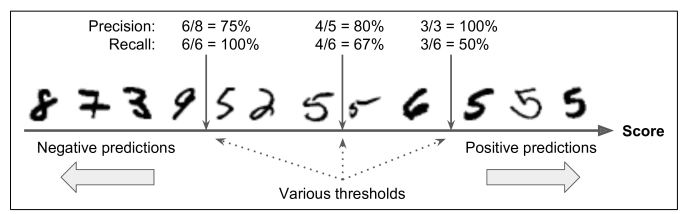

Let's work with these scores:

In [17]:
y_scores = sgd_clf.decision_function(some_digit)
y_scores

array([2164.22030239])

In [18]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [19]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred


array([False])

**What threshold to use?**

In [20]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5['class'], cv = 3, method = 'decision_function')

Let's use a `precision_recall_curve()` function

In [21]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5['class'], y_scores)

A Precision / Recall vs Treshold can help to define the best threshold for the model:

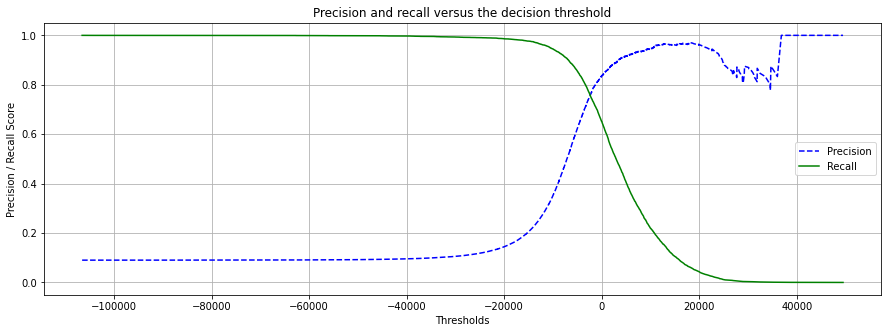

In [22]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    ax, fig = plt.subplots(figsize = (15, 5))
    plt.plot(thresholds, precisions[: -1], 'b--', label = 'Precision')
    plt.plot(thresholds, recalls[: -1], 'g-', label = 'Recall')
    
    plt.xlabel('Thresholds')
    plt.ylabel('Precision / Recall Score')
    plt.title('Precision and recall versus the decision threshold')
    plt.legend(loc = 'best')
    plt.grid(True)
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

Another way to select a good precision/recall tradeoff is plotting Precision vs Recall:

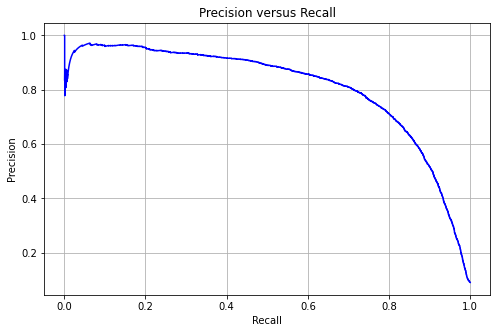

In [23]:
def plot_precision_vs_recall(precisions, recalls):
    ax, fig = plt.subplots(figsize = (8, 5))
    ax1 = plt.plot(recalls[: -1], precisions[: -1], 'b-', label = 'Precision vs Recall')
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision versus Recall')
    plt.grid(True)
    
plot_precision_vs_recall(precisions, recalls)
plt.show()

Note that precision really starts to fall sharply around 80% recall. Which suggest that
probably it would be better to select a precision/recall tradeoff just before that drop.
***
Deciding to aim for a precision of 90%, which suggest to use a threshold of about 3000.

In [24]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

3370.019499143958

In [25]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [26]:
precision = precision_score(y_train_5['class'], y_train_pred_90)
recall = recall_score(y_train_5['class'], y_train_pred_90)
f1 = f1_score(y_train_5['class'], y_train_pred_90)

print("1- Precision:\n\t", precision)
print("2- Recall:\n\t", recall)
print("2- F_1:\n\t", f1)

1- Precision:
	 0.9000345901072293
2- Recall:
	 0.4799852425751706
2- F_1:
	 0.626082771896054


This shows a classifier with a prediction of 90%, however, the Recall value is too low 62%.

#### **The ROC Curve*** (Receiving Operating Characteristic)
***
- Common Tool used in binary classifiers
- Similar to precision/recall curve
- Plots the **True Positive rate** (Another name for recall) vs **False Positive Rate (FPR)**

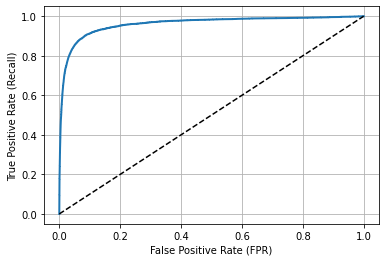

In [27]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5['class'], y_scores)

def plot_roc_curve(frp, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (Recall)')
    plt.grid(True)
    
plot_roc_curve(fpr, tpr)
plt.show()

Note: 

- There is a tradeoff: the higher the recall (TPR), the more false positives
(FPR) the classifier produces. The dotted line represents the ROC curve of a purely
random classifier; a good classifier stays as far away from that line as possible (toward
the top-left corner).

- *One way to compare classifiers is to measure the area under the curve (AUC). A per‐
fect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will
have a ROC AUC equal to 0.5. Scikit-Learn provides a function to compute the ROC
AUC*

In [28]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5['class'], y_scores)

0.9604938554008616

## Multiclass Classification
---
*Whereas binary classifiers distinguish between two classes, multiclass classifiers (also
called multinomial classifiers) can distinguish between more than two classes.*
***
**Strategies for using binary classification algorithms for multi-class classification problems:**

**OvA** stands for one-vs-all or one-vs-rest. It involves splitting the multi-class dataset into multiple binary classification problems, one for each class. For example, if we have a four-class problem, we can create four binary datasets, each with one class as the positive class and the rest as the negative class. Then, we can train a binary classifier on each dataset and use it to predict the probability of the positive class. To make a final prediction, we can choose the class with the highest probability.

**OvO** stands for one-vs-one. It involves splitting the multi-class dataset into multiple binary classification problems, one for each pair of classes. For example, if we have a four-class problem, we can create six binary datasets, each with two classes. Then, we can train a binary classifier on each dataset and use it to predict the class label. To make a final prediction, we can use a voting scheme, such as majority vote, to combine the predictions from all classifiers.

*`Scikit-Learn` detects when you try to use a binary classification algorithm for a multi‐
class classification task, and it automatically runs OvA (except for SVM classifiers for
which it uses OvO)*

In [29]:
sgd_clf.fit(X_train, y_train['class']) # y_train, not y_train_5
sgd_clf.predict(some_digit)

array([3])

Under the hood, `Scikit-Learn` actually trained 10 binary classifiers, got their decision scores for the image, and selected the class with the highest score.

In [30]:
some_digit_scores = sgd_clf.decision_function(some_digit)
some_digit_scores

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [31]:
np.argmax(some_digit_scores)

3

In [32]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [33]:
sgd_clf.classes_[3]

3

In [34]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train['class'])
forest_clf.predict(some_digit)

array([5])

In [35]:
forest_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [36]:
forest_clf.predict_proba(some_digit)

array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.87, 0.  , 0.03, 0.01, 0.  ]])

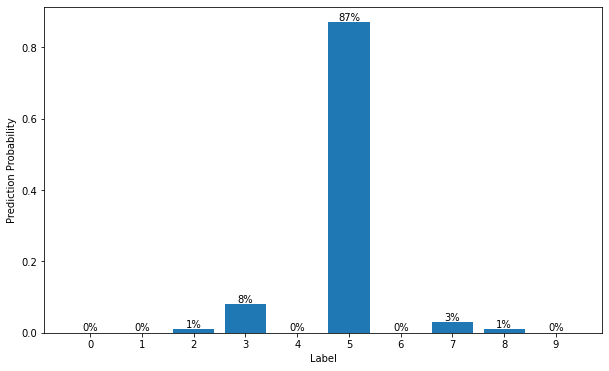

In [37]:
predict_probability = forest_clf.predict_proba(some_digit).tolist()[0]
ax, fig = plt.subplots(figsize = (10, 6))
ax1 = plt.bar(forest_clf.classes_, predict_probability)
plt.xticks(range(len(forest_clf.classes_)), forest_clf.classes_)
plt.xlabel('Label')
plt.ylabel('Prediction Probability')
plt.bar_label(ax1, [f'{label * 100:.0f}%' for label in predict_probability])
plt.show()

**Note:**
***
-  The classifier is fairly confident about its prediction: The model estimates a 87% probability that the image represents a 5. It also thinks that the image could instead be a 2, a 3, 4, 8, 9 respectively with 2%, 6%, 1%, 2% and 2% of probability.

Evaluating the classifiers with `cross_val_score()`

In [38]:
cross_val_score(forest_clf, X_train, y_train['class'], cv = 3, scoring = 'accuracy')

array([0.9645 , 0.96305, 0.96585])

In [39]:
cross_val_score(sgd_clf, X_train, y_train['class'], cv = 3, scoring = 'accuracy')

array([0.87365, 0.85835, 0.8689 ])

The results can be improved by scaling the inputs with `StandardScaler()`

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [41]:
cross_val_score(forest_clf, X_train_scaled, y_train['class'], cv = 3, scoring = 'accuracy')

array([0.9643 , 0.9636 , 0.96635])

In [42]:
cross_val_score(sgd_clf, X_train_scaled, y_train['class'], cv = 3, scoring = 'accuracy')

array([0.8983, 0.891 , 0.9018])

# Error Analysis

In [43]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train['class'], cv = 3)
conf_mx  = confusion_matrix(y_train['class'], y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

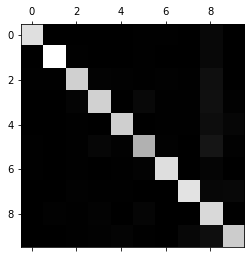

In [46]:
plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.show()

This confusion matrix looks fairly good, since most images are on the main diagonal,
which means that they were classified correctly.

Let's try with the random forest classifier:

In [ ]:
y_train_pred = cross_val_predict(forest_clf, X_train_scaled, y_train['class'], cv = 3)
conf_mx  = confusion_matrix(y_train['class'], y_train_pred)

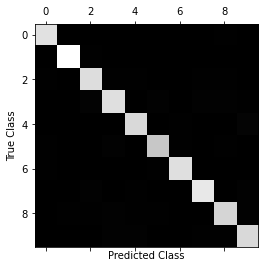

In [56]:
plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

The random forest classifier seems to achieve better results than de SGD Classifier

### Comparing Error rates

... by divide each value in the confusion matrix by the number of images in the corresponding class.

In [70]:
row_sums = conf_mx.sum(axis = 1, keepdims = True)
norm_conf_mx = conf_mx / row_sums

Bright classifications suggests improvement opportunities for the model, i.e. the 4 images classified as 4. This can be approach by gathering more training data for digits that
look like 4s (but are not) so the classifier can learn to distinguish them from real 4s

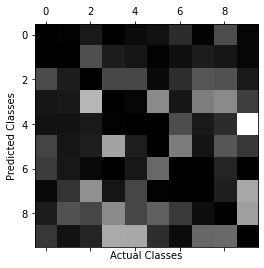

In [73]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap = plt.cm.gray)
plt.xlabel('Actual Classes')
plt.ylabel('Predicted Classes')
plt.show()

# Multilabel Classification
---
*(Multiple binary classification)*
The following code creates a `y_multilabel` array containing two target labels for each digit
image: the first indicates whether or not the digit is large (7, 8, or 9) and the second
indicates whether or not it is odd. The next lines create a `KNeighborsClassifier`
instance (which supports multilabel classification, but not all classifiers do) and we
train it using the multiple targets array. 

In [80]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [81]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [82]:
knn_clf.predict(some_digit)

array([[False,  True]])

In [84]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv = 3)
f1_score(y_multilabel, y_train_knn_pred, average = 'weighted')

0.9778357403921755

# Multioutput Classification
---
A multilabel classification where each label can be multiclass (i.e., it can have
more than two possible values):
- Starting by adding noise to an image's pixel intensity using NumPy’s randint() function. The target
image will be the original image.

In [118]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [119]:
X_test_mod.reset_index(inplace = True, drop = True)
X_test_mod.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,90.0,31.0,45.0,82.0,60.0,86.0,23.0,48.0,33.0,5.0,...,94.0,89.0,60.0,44.0,84.0,59.0,31.0,95.0,92.0,20.0
1,78.0,69.0,19.0,48.0,14.0,83.0,21.0,77.0,56.0,22.0,...,72.0,6.0,19.0,42.0,6.0,76.0,15.0,58.0,84.0,52.0
2,74.0,13.0,8.0,11.0,49.0,98.0,81.0,45.0,52.0,14.0,...,19.0,51.0,82.0,33.0,29.0,74.0,26.0,57.0,46.0,49.0
3,9.0,75.0,10.0,95.0,25.0,50.0,49.0,48.0,94.0,55.0,...,51.0,76.0,1.0,71.0,31.0,37.0,87.0,6.0,20.0,85.0
4,42.0,23.0,51.0,69.0,63.0,55.0,25.0,8.0,95.0,41.0,...,19.0,33.0,47.0,31.0,52.0,68.0,79.0,4.0,19.0,83.0


In [113]:
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier()

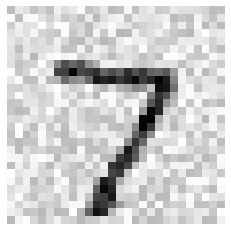

In [122]:
some_mod_digit = X_test_mod.head(1)
some_mod_digit_image = np.array(some_mod_digit).reshape(28, 28)

plt.imshow(some_mod_digit_image, cmap = mpl.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

In [145]:
clean_digit = pd.DataFrame(knn_clf.predict(some_mod_digit))


In [146]:
clean_digit.columns = some_mod_digit.columns
clean_digit

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
forest_clf.predict(some_mod_digit)

array([2])

In [148]:
forest_clf.predict(clean_digit)

array([7])

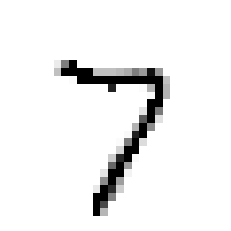

In [154]:
clean_digit_image = np.array(clean_digit).reshape(28, 28)

plt.imshow(clean_digit_image, cmap = mpl.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()